In [1]:
# Import packages
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np

In [2]:
import warnings as wn

In [3]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
ds_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [14]:
filename_k11 = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path_k11 = rootdir+experiment+'/'+filename
ds_k11 = xr.open_mfdataset(path_k11, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [21]:
def graph_year(ds, in_year, plot, title):
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    Z = ds['MI'].sel(year=in_year).squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)
    if plot == axs[0,0]:
        cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
        cbar.set_label('metabolic index',fontsize=12)
    
    # Zoom in on a region
    # ax.set_extent([120,180,-30,30])

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')

In [22]:
def graph_date(ds, date, plot, title):
        
    clevs = np.array([0,1,2,3,4,120])
    colorange = ['red', 'orange', 'yellow','green','blue']
    crs = ccrs.PlateCarree()
    X = ds['xt_ocean']
    Y = ds['yt_ocean']
    Z = ds['MI'].sel(time=date).squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,clevs,colors=colorange,transform=crs)
    if plot == axs[0,0]:
        cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
        cbar.set_label('metabolic index',fontsize=12)
    
    # Zoom in on a region
    # ax.set_extent([120,180,-30,30])

    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')

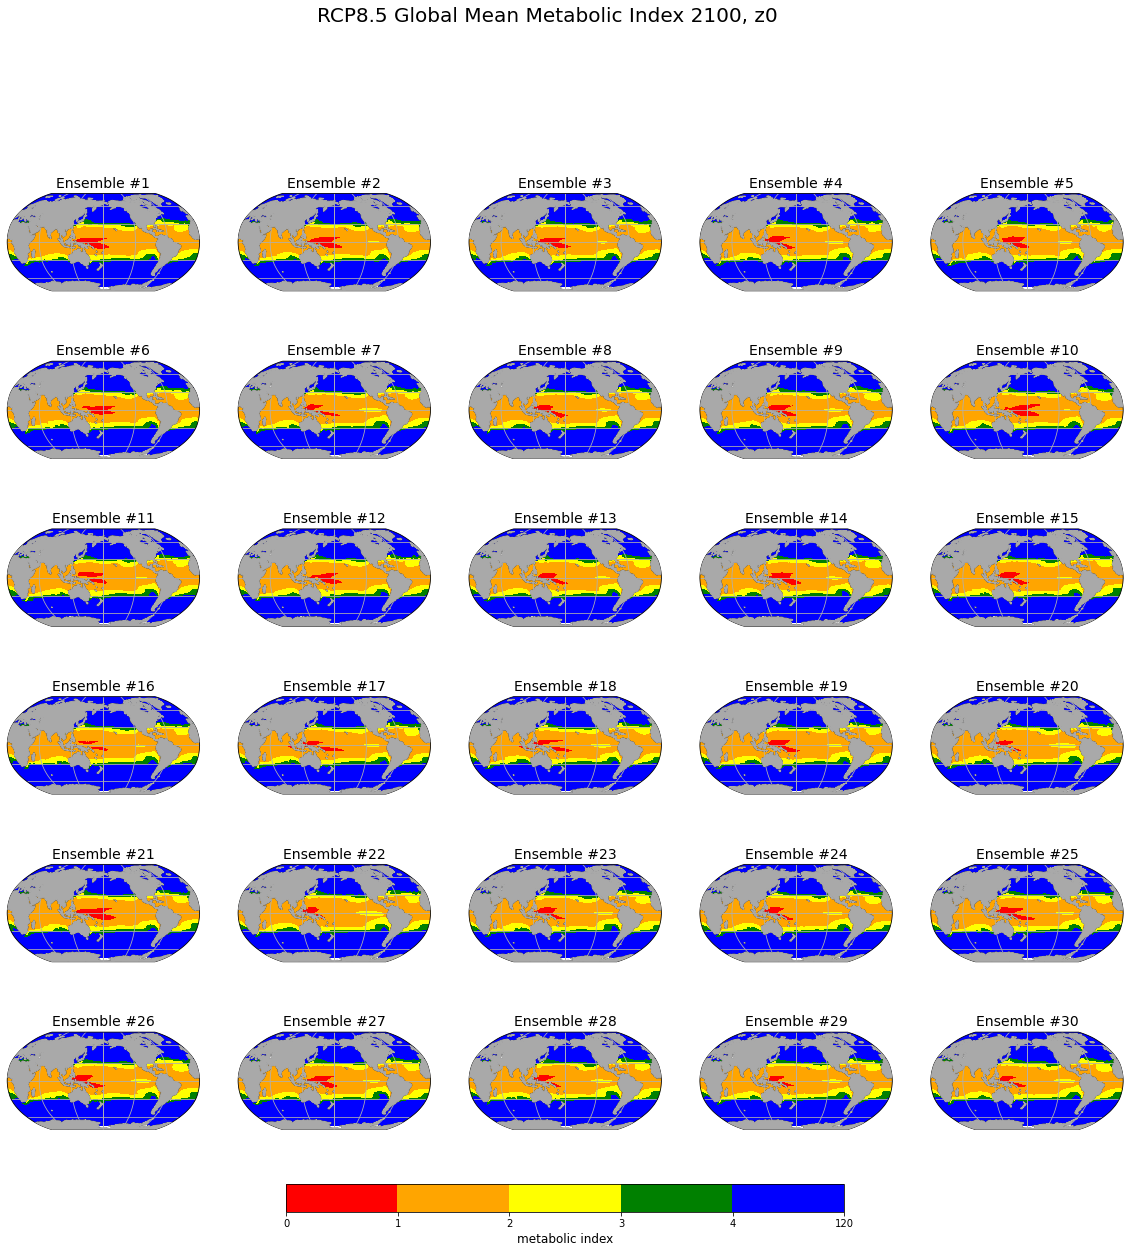

In [23]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Mean Metabolic Index 2100, z0',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum).groupby('time.year').mean(dim='time')
        graph_year(ds_ens,2100,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

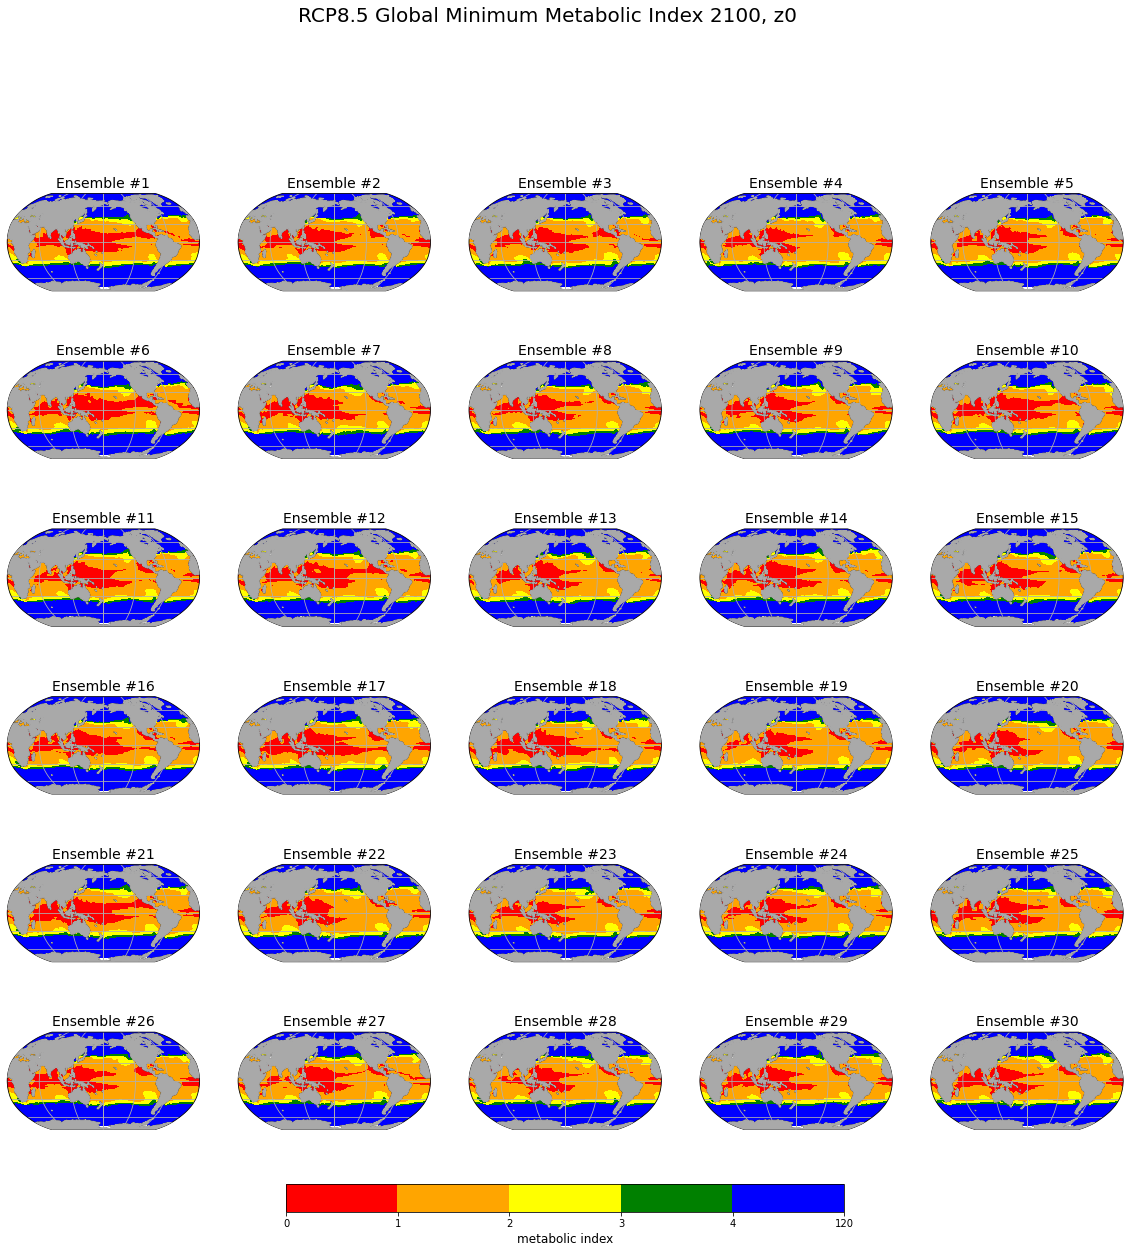

In [24]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Minimum Metabolic Index 2100, z0',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum).groupby('time.year').min(dim='time')
        graph_year(ds_ens,2100,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

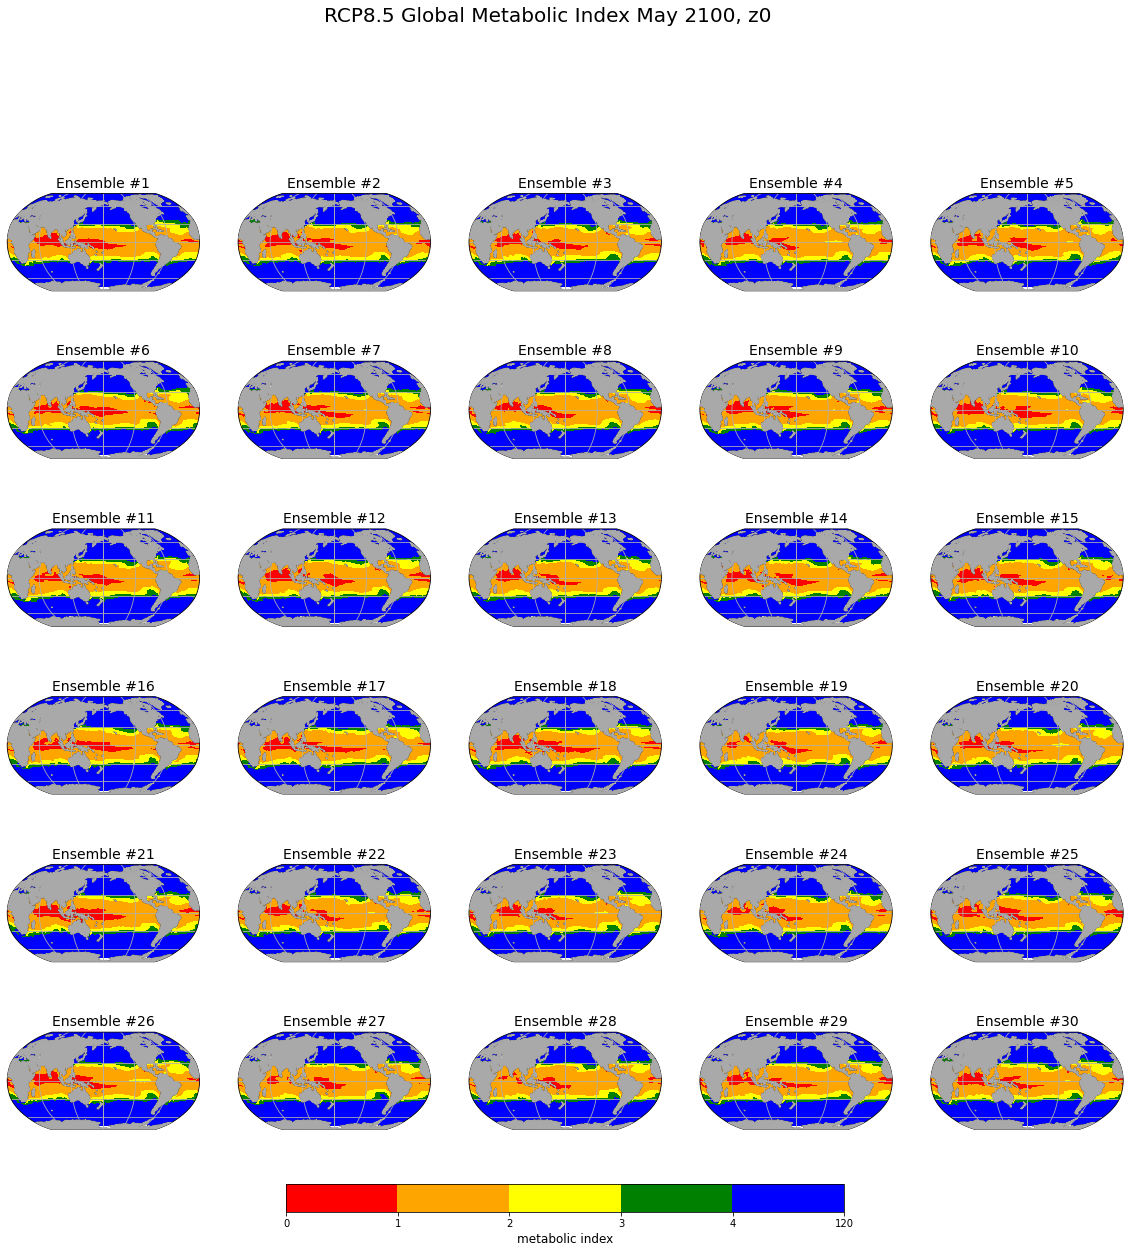

In [25]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index May 2100, z0',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph_date(ds_ens,'2100-05-16',axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

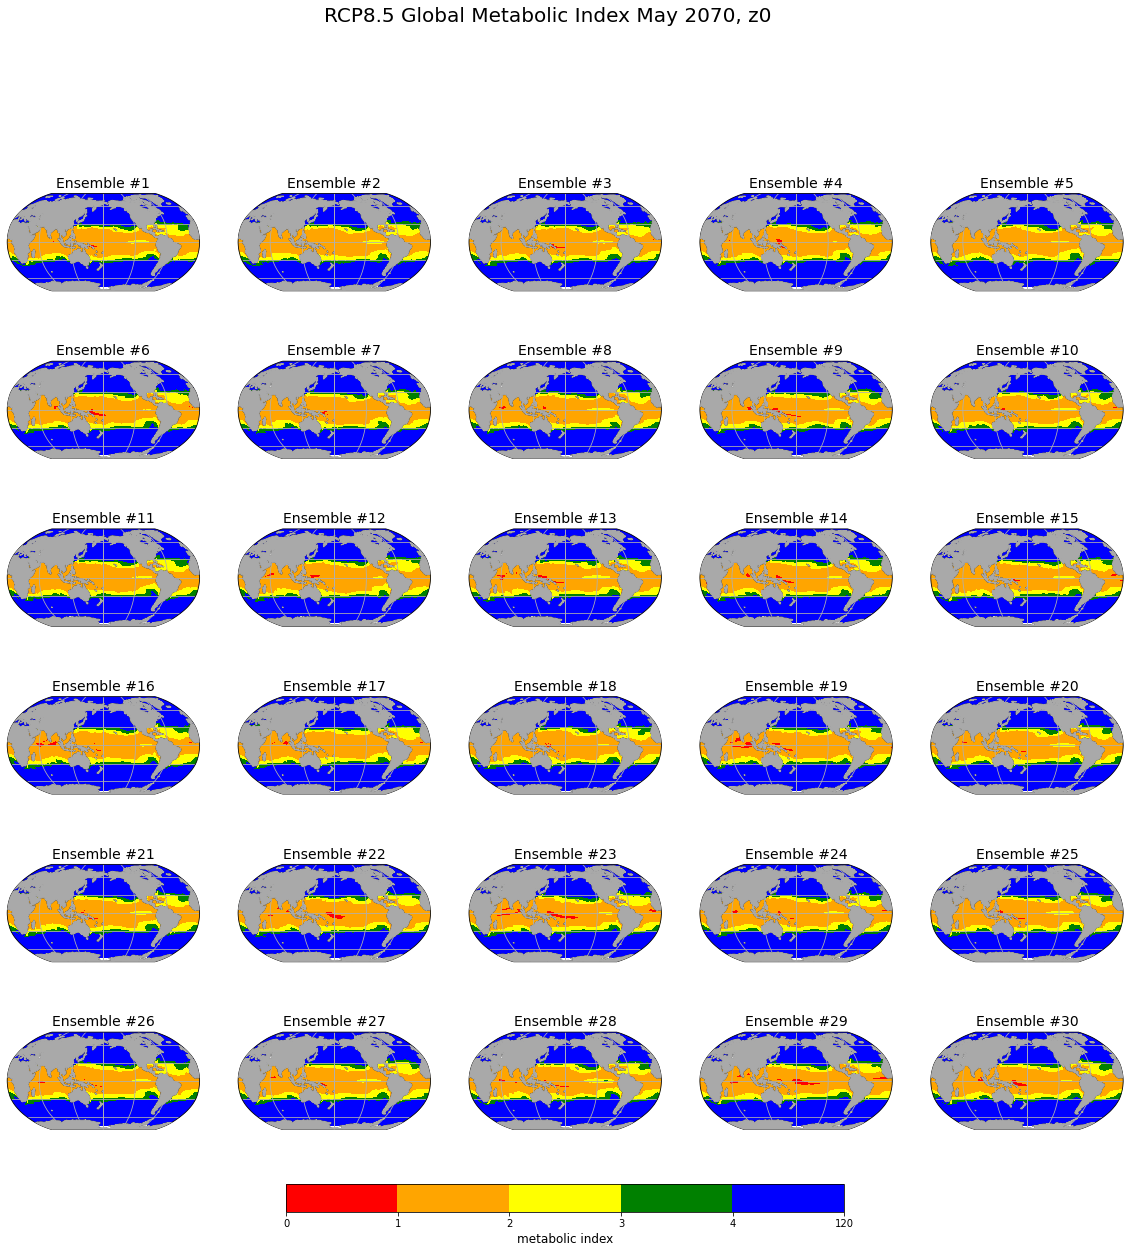

In [26]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index May 2070, z0',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph_date(ds_ens,'2070-05-16',axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

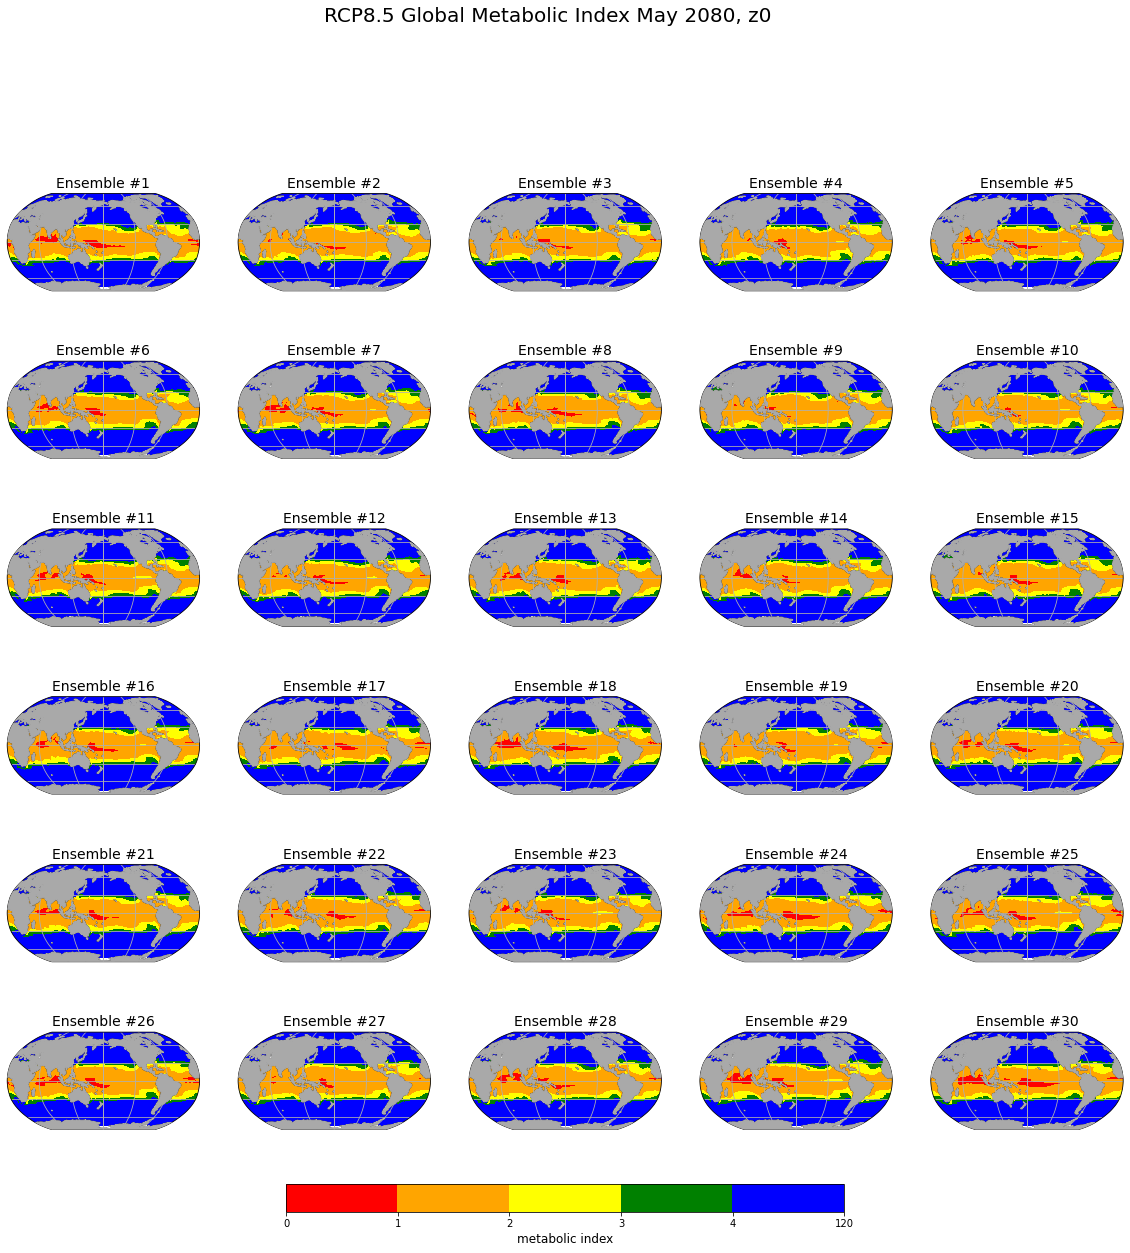

In [27]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index May 2080, z0',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_all.sel(ensemble=ensNum)
        graph_date(ds_ens,'2080-05-16',axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

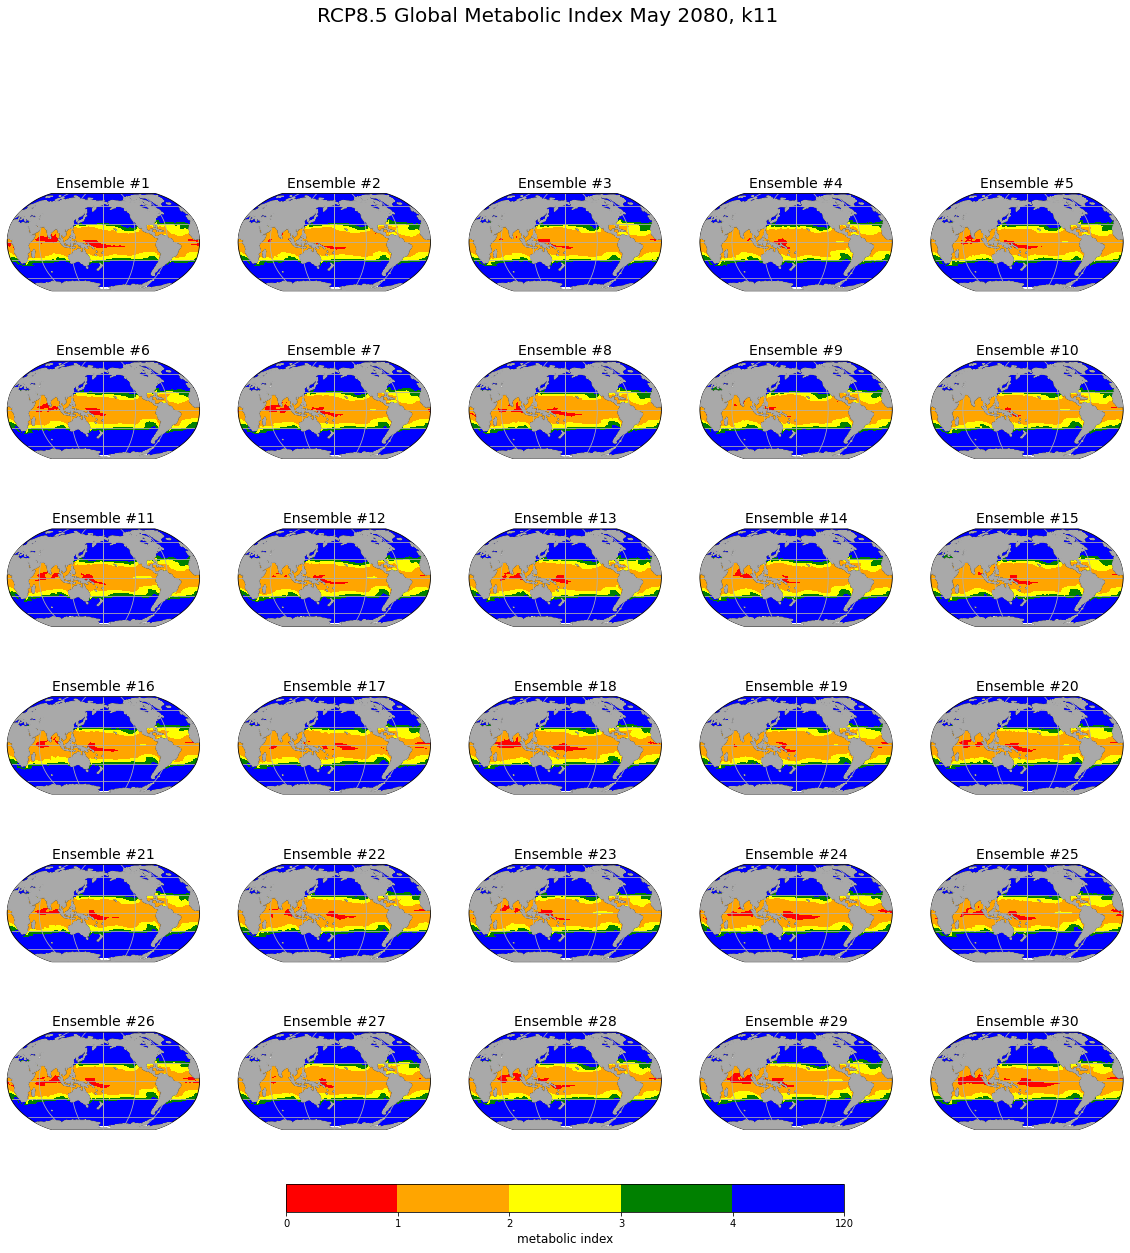

In [28]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index May 2080, k11',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_k11.sel(ensemble=ensNum)
        graph_date(ds_ens,'2080-05-16',axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

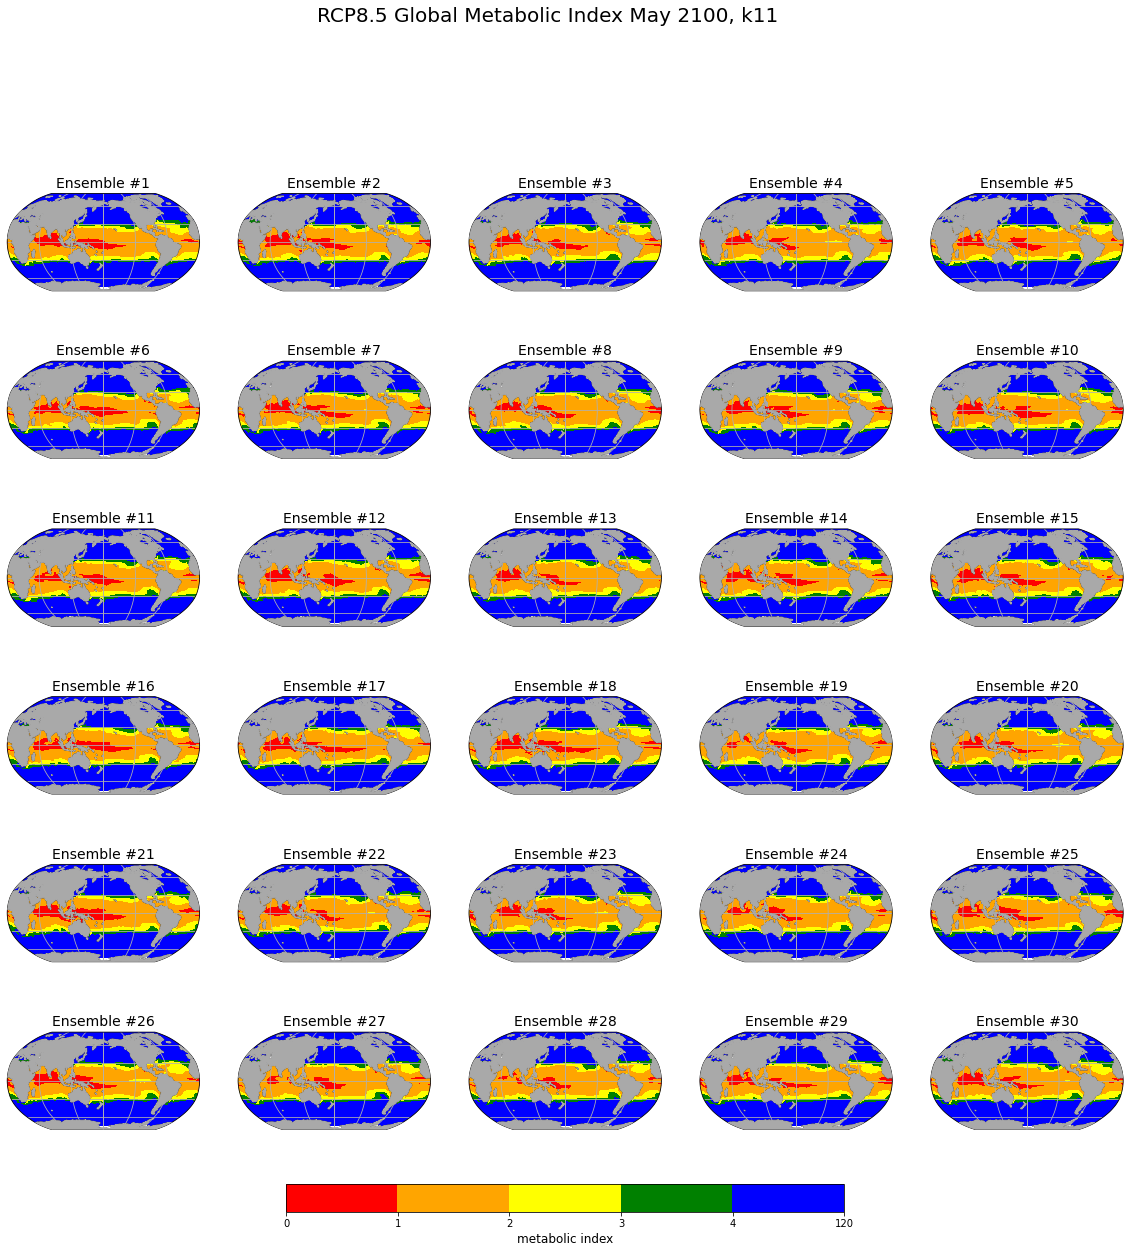

In [29]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Metabolic Index May 2100, k11',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_k11.sel(ensemble=ensNum)
        graph_date(ds_ens,'2100-05-16',axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

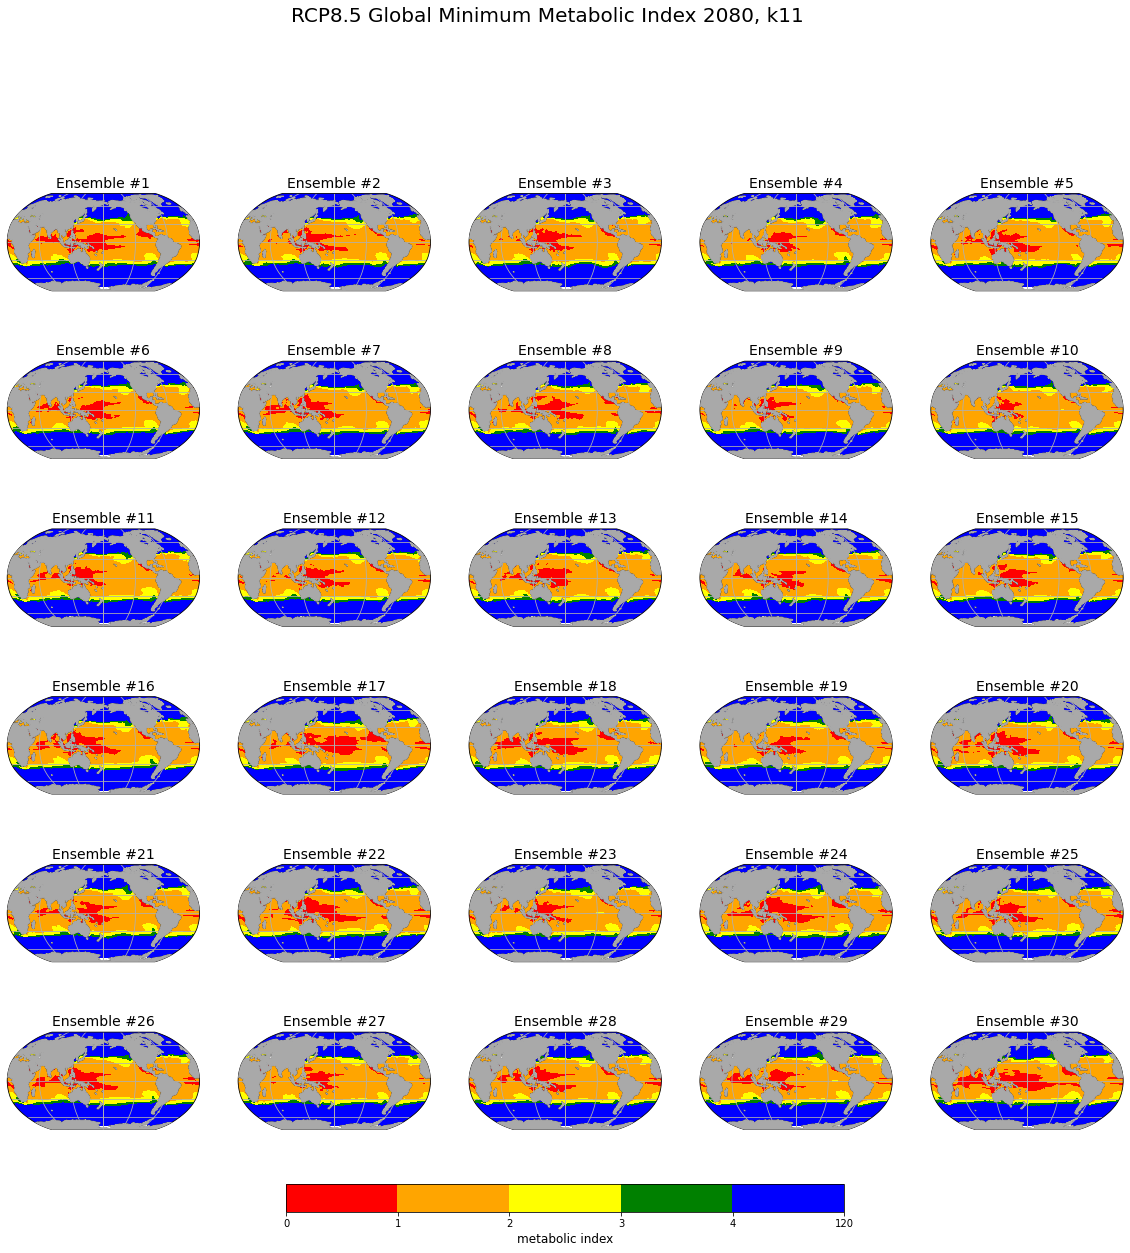

In [20]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Minimum Metabolic Index 2080, k11',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_k11.sel(ensemble=ensNum).groupby('time.year').min(dim='time')
        graph_year(ds_ens,2080,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1

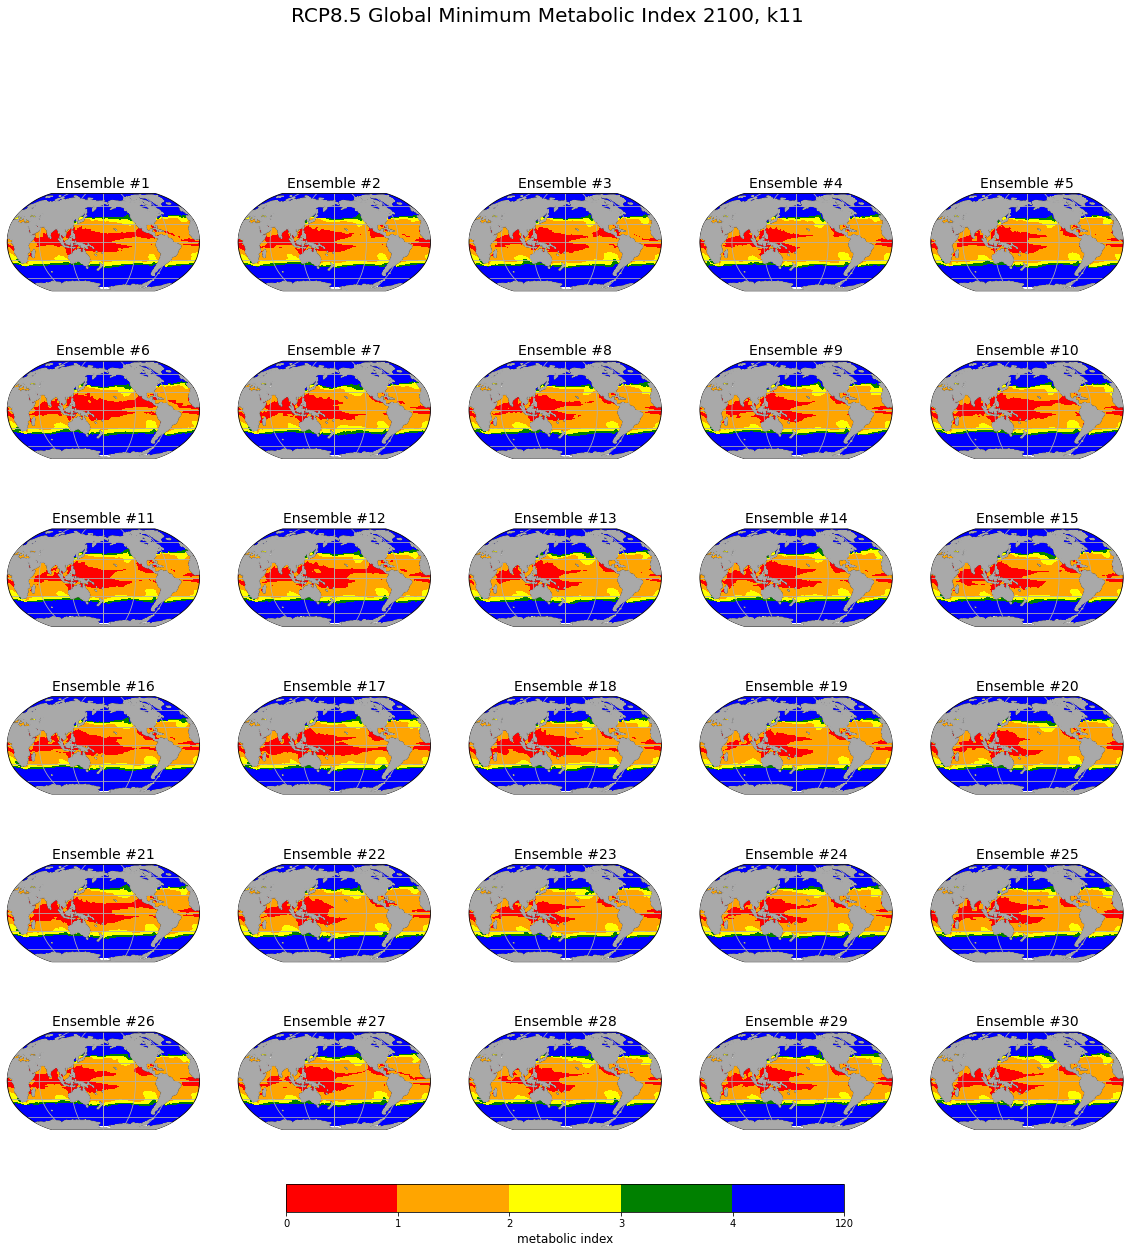

In [30]:
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Global Minimum Metabolic Index 2100, k11',fontsize=20) # Specify a figure title
wn.filterwarnings('ignore')
ensNum = 0
for row in range(6):
    for col in range(5):
        ds_ens = ds_k11.sel(ensemble=ensNum).groupby('time.year').min(dim='time')
        graph_year(ds_ens,2100,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1